<a href="https://colab.research.google.com/github/Aashish123-aikki/MachineLearning/blob/main/Image_Classsifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
 import cv2 
 import numpy as np

In [60]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
from matplotlib import pyplot as plt

In [62]:
img=cv2.imread('/content/drive/MyDrive/image classifier/dhnoii1.jpg')

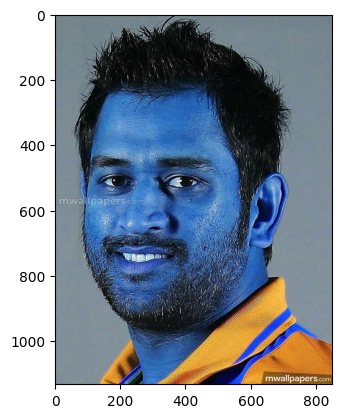

In [63]:
plt.imshow(img)

In [64]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray

array([[125, 132, 136, ..., 133, 134, 134],
       [123, 127, 129, ..., 133, 133, 133],
       [126, 125, 125, ..., 132, 133, 133],
       ...,
       [142, 143, 144, ...,  65,  64,  66],
       [141, 142, 143, ...,  74,  61,  63],
       [140, 141, 142, ...,  96, 105, 107]], dtype=uint8)

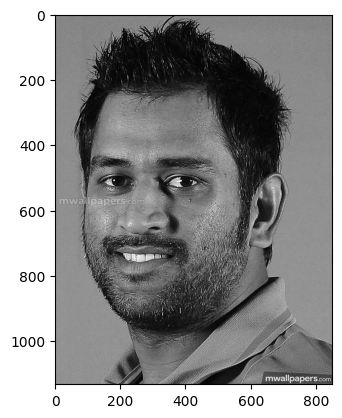

In [65]:
plt.imshow(gray,cmap='gray')

In [66]:
face_cascade=cv2.CascadeClassifier('/content/drive/MyDrive/image classifier/haarcascade_frontalface_default.xml')
eye_cascade=cv2.CascadeClassifier('/content/drive/MyDrive/image classifier/haarcascade_eye.xml')

In [67]:
face=face_cascade.detectMultiScale(gray,1.3,5)

In [68]:
face

array([[ 26, 283, 559, 559]], dtype=int32)

In [69]:
(x,y,w,h)=face[0]

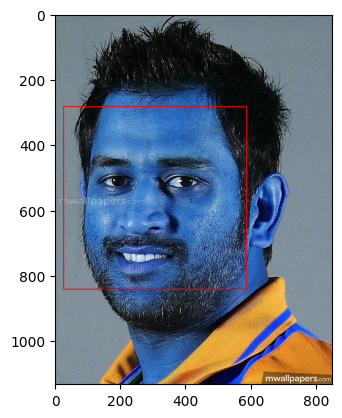

In [70]:
face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

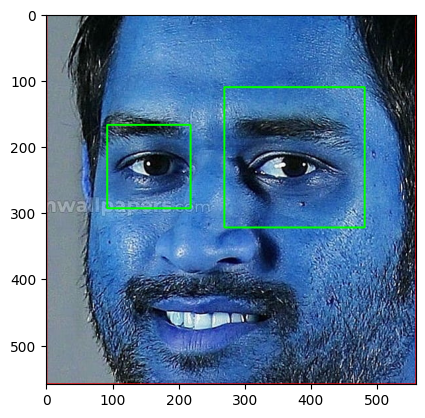

In [71]:
cv2.destroyAllWindows()
for (x,y,w,h) in face:
  face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  roi_gray=gray[y:y+h,x:x+w]
  roi_color=face_img[y:y+h,x:x+w]
  eye=eye_cascade.detectMultiScale(roi_gray)
  for (ex,ey,ew,eh) in eye:
    cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.figure()
plt.imshow(roi_color,cmap='gray')

In [72]:
def cropface(imgurl):
  img=cv2.imread(imgurl)
  if img is not None :
      gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
      face=face_cascade.detectMultiScale(gray,1.3,5)
      for (x,y,w,h) in face:
        roi_gray=gray[y:y+h,x:x+w]
        roi_color=img[y:y+h,x:x+w]
        eye=eye_cascade.detectMultiScale(roi_gray)
        if(len(eye)>=2):
          return roi_color

[[[120 136 148]
  [124 140 152]
  [128 142 154]
  ...
  [  7  10   8]
  [  7  10   8]
  [  8  11   9]]

 [[122 138 150]
  [126 142 154]
  [130 144 156]
  ...
  [ 10  13  11]
  [  9  12  10]
  [ 10  13  11]]

 [[120 137 146]
  [124 141 150]
  [128 143 152]
  ...
  [ 10  13  11]
  [  8  11   9]
  [ 10  13  11]]

 ...

 [[130 143 151]
  [130 143 151]
  [131 143 149]
  ...
  [ 63 106 179]
  [ 84 127 200]
  [ 64 109 182]]

 [[128 142 148]
  [128 142 148]
  [132 147 150]
  ...
  [ 78 123 191]
  [ 86 131 199]
  [ 54 100 171]]

 [[127 141 147]
  [128 142 148]
  [133 148 151]
  ...
  [ 70 115 183]
  [ 72 117 185]
  [ 32  78 149]]]


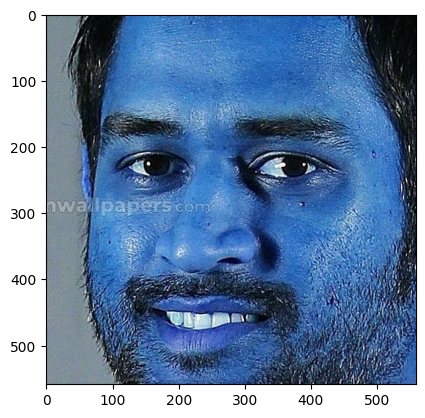

In [73]:
get_croped=cropface('/content/drive/MyDrive/image classifier/dhnoii1.jpg')
print(get_croped)
plt.imshow(get_croped)

In [74]:
path_to_data="/content/drive/MyDrive/image classifier/datasets/"
path_to_cr_data="/content/drive/MyDrive/image classifier/datasets/cropped"

In [75]:
import os
img_dirs=[]
for entry in os.scandir(path_to_data):
  if entry.is_dir():
    img_dirs.append(entry.path)

In [76]:
img_dirs

['/content/drive/MyDrive/image classifier/datasets/rohit sharma',
 '/content/drive/MyDrive/image classifier/datasets/kl rahul',
 '/content/drive/MyDrive/image classifier/datasets/virat kohli',
 '/content/drive/MyDrive/image classifier/datasets/dhoni',
 '/content/drive/MyDrive/image classifier/datasets/hardik pandya']

In [77]:
import shutil
if os.path.exists(path_to_cr_data):
  shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [78]:
croped_dir=[]
celeb_file_name={}
for img_dir in img_dirs:
  count=1
  name=img_dir.split('/')[-1]
  celeb_file_name[name]=[]
  
  for entry in os.scandir(img_dir):
    roi_color=cropface(entry.path)
    if roi_color is not None:
      cropped_folder=path_to_cr_data +'/'+ name
      
      if not os.path.exists(cropped_folder):
        croped_dir.append(cropped_folder)
        os.mkdir(cropped_folder)
      croped_file_name=name+str(count)+".png"
      croped_file_path=cropped_folder+'/'+croped_file_name

      cv2.imwrite(croped_file_path,roi_color)
      celeb_file_name[name].append(croped_file_path)
      count+=1

In [85]:
import numpy as np
import pywt
import cv2

def w2d(img,mode='haar',level=1):
  # convert to grey
  imArray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
  # convert to float
  imArray=np.float32(imArray)
  imArray/=255
  #compute cofficients
  coffec=pywt.wavedec2(imArray,mode,level=level)

  #process cofficients
  coffe_H=list(coffec)
  coffe_H[0]*=0;

  # reconstuction
  imArray_H=pywt.waverec2(coffe_H,mode)
  imArray_H*=255;
  imArray_H=np.uint8(imArray_H)
  return imArray


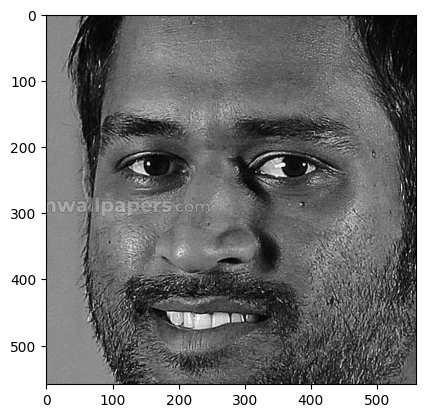

In [86]:
im_har=w2d(get_croped,'db1',5)
plt.imshow(im_har,cmap='gray')

In [87]:
class_dict={}
count=0
for celeb_name in celeb_file_name.keys():
  class_dict[celeb_name]=count
  count+=1
class_dict

{'rohit sharma': 0,
 'kl rahul': 1,
 'virat kohli': 2,
 'dhoni': 3,
 'hardik pandya': 4}

In [91]:
x=[]
y=[]  
for celebrity_name,target_path in celeb_file_name.items():
  for taget in target_path:
    img=cv2.imread(taget)
    if img is None:
      continue
    scaled_img=cv2.resize(img,(32,32))
    img_har=w2d(img,'db1',5)
    scaled_img_har=cv2.resize(img_har,(32,32))
    combined_img=np.vstack((scaled_img.reshape(32*32*3,1),scaled_img_har.reshape(32*32,1)))
    x.append(combined_img)
    y.append(class_dict[celebrity_name])


In [99]:
x=np.array(x).reshape(len(x),32*32*3+32*32).astype(float)
x.shape

(291, 4096)

In [ ]:
y